In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
train_digi = pd.read_csv("Downloads/digi_train.csv")
test_digi = pd.read_csv("Downloads/digi_test.csv")
print(train_digi.shape, test_digi.shape)

(42000, 785) (28000, 784)


In [3]:
train_digi.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_digi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### All the datapoints are of integer datatype

In [5]:
train_digi.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Cleaning the Data

In [6]:
train_digi.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

### No null values

## Relationship between Data and to identofy outliers

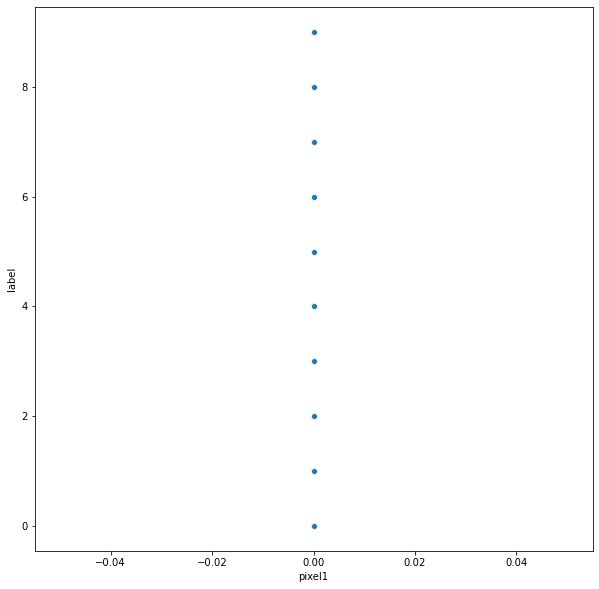

In [7]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_digi["pixel1"], y = train_digi["label"])
plt.show()

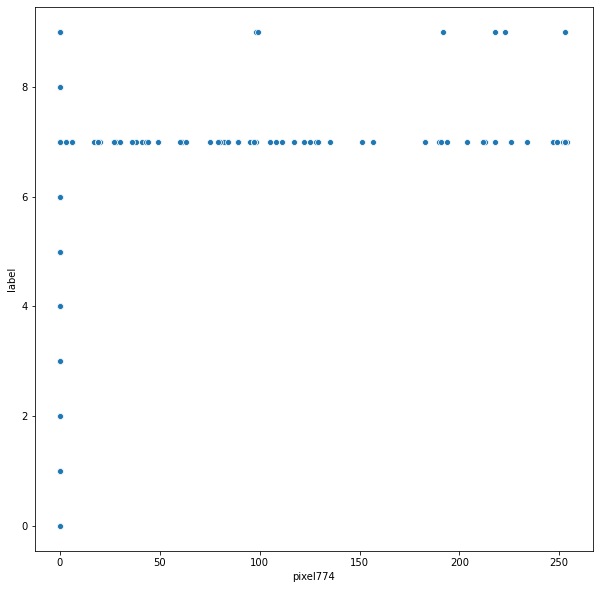

In [8]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = train_digi["pixel774"], y = train_digi["label"])
plt.show()

### No Outlayers in the train data

In [9]:
x = train_digi.iloc[:, 1:]
y = train_digi.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31500, 784) (10500, 784) (31500,) (10500,)


In [ ]:
log_res = LogisticRegression(max_iter = 1000, solver = "saga")
log_res.fit(x_train,y_train)

In [16]:
y_pred = log_res.predict(x_test)

In [18]:
accuracy_score(y_test,y_pred)

0.9015238095238095

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1015
           1       0.95      0.97      0.96      1190
           2       0.89      0.88      0.89      1077
           3       0.88      0.88      0.88      1070
           4       0.90      0.90      0.90      1034
           5       0.87      0.85      0.86       930
           6       0.91      0.94      0.93      1044
           7       0.93      0.91      0.92      1129
           8       0.85      0.85      0.85       995
           9       0.87      0.88      0.87      1016

    accuracy                           0.90     10500
   macro avg       0.90      0.90      0.90     10500
weighted avg       0.90      0.90      0.90     10500



In [22]:
print(confusion_matrix(y_test, y_pred))

[[ 951    0   14    5    2    8   19    4    9    3]
 [   0 1150    6    9    1    2    4    1   13    4]
 [   7   16  949   25   13    7   19   12   22    7]
 [   6    3   26  943    3   41    4    8   20   16]
 [   6    9   12    1  930    4   16    8    9   39]
 [  13    6    8   31   10  787   23    2   40   10]
 [  10    0   15    0   14    9  986    0    9    1]
 [   8    6   10   11   15    2    1 1032   11   33]
 [   5   15   17   34    9   39    9    2  847   18]
 [   4    2    6   12   34    8    2   46   11  891]]
